## Comparing Rates of Divorce in the U.S. by Region

### Data available from U.S. Census
Using U.S. Census data, we investigate variation in divorce rates over nine official census regions.
The data, it should be noted, are not collected in a regular fashion due to the federal structure
of government in the United States.  The method of calculating rates, therefore, may not be 
consistent from state to state.  For some states, little or no data are available over the period (1990 to 2016).
Prior to 1999, the statistics are reported only in five-year increments.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import Excel file of Divorce rates by state
file = 'C:/Users/Tom_Tosh/Documents/Python projects/state_divorce_ratesFORIMPORT.xlsx'
divorce_rates = pd.read_excel(file, sheet_name = None, header = 0, index_col=0, label = 'State', dtype={'State': str})
print(divorce_rates.head())
print(divorce_rates.tail())

               2016     2015     2014     2013 2012 2011 2010 2009 2008 2007  \
State                                                                          
Alabama     3.77871  3.85369  3.78502  3.68329  3.6  4.3  4.4  4.4  4.3  4.5   
Alaska      3.94666   4.1385  3.95123  4.46178  4.5  4.8  4.7  4.4  4.4  4.3   
Arizona     3.35201  3.57847  3.89201  3.92915  4.3  3.9  3.5  3.6  3.8    4   
Arkansas    3.92638  4.84252  4.84532  5.01187  5.3  5.3  5.7  5.7  5.5  5.9   
California      ---      ---      ---      ---  ---  ---  ---  ---  ---  ---   

           2006 2005 2004 2003 2002 2001 2000 1999 1995 1990  
State                                                         
Alabama     4.9  4.9  4.9  5.2  5.4  5.4  5.5  5.7    6  6.1  
Alaska      4.2  4.3  4.3  3.9  4.6  4.3  3.9    5    5  5.5  
Arizona       4  4.2  4.3  4.4  4.8    4  4.6  4.6  6.2  6.9  
Arkansas    5.8    6  6.1    6  6.2  6.2  6.4  6.2  6.3  6.9  
California  ---  ---  ---  ---  ---  ---  ---  ---  ---  4.3 

In [2]:
# Delete empty rows
divorce_rates.dropna(how='all', inplace=True)
print(divorce_rates.tail())

                  2016     2015     2014     2013 2012 2011 2010 2009 2008  \
State                                                                        
Virginia       3.37395  3.30097  3.48162  3.55891  3.7  3.8  3.8  3.7  3.8   
Washington     3.48367   3.3831  3.64935  3.82147  3.9  4.1  4.2  3.9  3.9   
West Virginia   3.7573   3.9802   4.1998  4.58717  4.7  5.2  5.1  5.1  4.8   
Wisconsin      2.59799  2.59663  2.65685  2.77587  2.9  2.9    3  2.9    3   
Wyoming        4.20324  4.14941  4.60325  4.25979  4.4  4.8  5.1  5.1  4.9   

              2007 2006 2005 2004 2003 2002 2001 2000 1999 1995 1990  
State                                                                 
Virginia       3.8    4    4  3.9    4  4.2  4.2  4.3  4.4  4.3  4.4  
Washington       4  4.1  4.3  4.3  4.4  4.6  4.5  4.6    5  5.4  5.9  
West Virginia  5.1    5  5.1    5  5.2  5.2  5.2  5.1  4.9  5.2  5.3  
Wisconsin      2.9    3  2.9    3  3.1  3.2  3.2  3.2  3.2  3.4  3.6  
Wyoming        4.9  5.1  5.

In [3]:
# Make yearly observations the first column by transposing
div_rates_ts = divorce_rates.T
# Sort first column in ascending order
div_rates_ts.sort_index(inplace=True)
# Add name for index
div_rates_ts.index.name = 'Year'
print(div_rates_ts.index.name)
print(div_rates_ts.head(3))

Year
State Alabama Alaska Arizona Arkansas California Colorado Connecticut  \
Year                                                                    
1990      6.1    5.5     6.9      6.9        4.3      5.5         3.2   
1995        6      5     6.2      6.3        ---      ---         2.9   
1999      5.7      5     4.6      6.2        ---      4.8           3   

State Delaware District of Columbia Florida   ...   South Dakota Tennessee  \
Year                                          ...                            
1990       4.4                  4.5     6.3   ...            3.7       6.5   
1995         5                  3.2     5.5   ...            3.9       6.2   
1999       4.5                  3.6     5.1   ...            3.7       5.8   

State Texas Utah Vermont Virginia Washington West Virginia Wisconsin Wyoming  
Year                                                                          
1990    5.5  5.1     4.5      4.4        5.9           5.3       3.6     6.6  
1

In [4]:
# Change index to datetime
div_rates_ts.index = pd.to_datetime(div_rates_ts.index, format='%Y', exact=True) # exact match to string format
# Convert strings to floats and missing values to NaN
div_rates_ts = div_rates_ts.apply(pd.to_numeric, errors='coerce')
orig_div_rates_ts = div_rates_ts  # Copy of original divorce rate time series for later use

In [26]:
# California has only 1 observation, Indiana 0; drop entire series
# MN, NM, LA, OK, GA, CO, HI have less than 20; missing data will be interpolated/extrapolated
div_rates_ts['California'].isnull().count()
div_rates_abridged = div_rates_ts.drop(['California', 'Indiana'], axis=1)
print(div_rates_abridged.columns) # confirm deletions

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut',
       'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
       'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'],
      dtype='object', name='State')


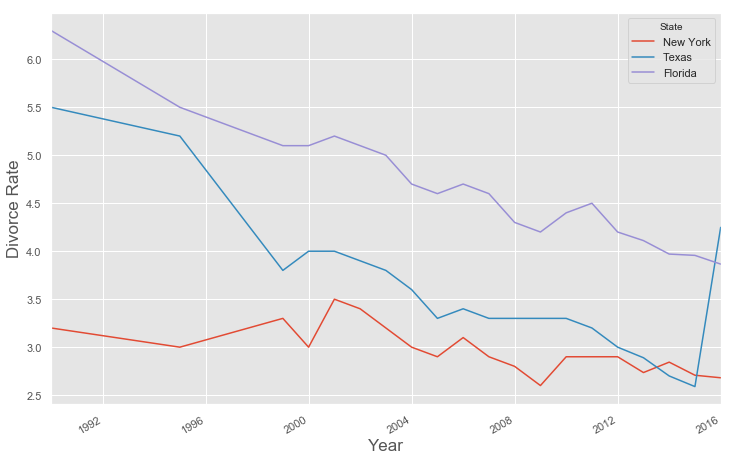

In [30]:
# Observe trend in complete data sets of states with largest
# populations (except California). Supports use of linear interpolation of missing data in incomplete series
%matplotlib inline
div_rates_abridged[['New York','Texas','Florida']].plot(figsize=(12, 8))
plt.ylabel('Divorce Rate')

### Trends in largest U.S. states
A plot of divorce rates in the three largest states (after California) shows a decreasing trend over time.
There is a notable difference in the rates of these geographically disparate states, Florida's
being particularly high.

In [7]:
# Replace missing data with interpolated values
div_rates_abridged[['Louisiana','Minnesota','New Mexico','Oklahoma','Georgia','Colorado','Hawaii']]\
    = div_rates_abridged[['Louisiana','Minnesota','New Mexico','Oklahoma','Georgia','Colorado','Hawaii']].\
    interpolate('linear', limit_direction='both')
# Check for any missing values
div_rates_abridged[['Louisiana','Minnesota','New Mexico','Oklahoma','Georgia','Colorado','Hawaii']].isnull()

State,Louisiana,Minnesota,New Mexico,Oklahoma,Georgia,Colorado,Hawaii
Year,,,,,,,
1990-01-01,False,False,False,False,False,False,False
1995-01-01,False,False,False,False,False,False,False
1999-01-01,False,False,False,False,False,False,False
2000-01-01,False,False,False,False,False,False,False
2001-01-01,False,False,False,False,False,False,False
2002-01-01,False,False,False,False,False,False,False
2003-01-01,False,False,False,False,False,False,False
2004-01-01,False,False,False,False,False,False,False
2005-01-01,False,False,False,False,False,False,False


In [8]:
# Dictionary with region-grouped states as keys, regions as values
region_dict = {('Connecticut','Maine','Massachusetts','New Hampshire','Rhode Island','Vermont'):'New England',\
               ('New Jersey','New York','Pennsylvania'):'Middle Atlantic', ('Illinois','Indiana','Michigan','Ohio','Wisconsin'):\
               'East North Central', ('Iowa','Kansas','Minnesota','Missouri','Nebraska','North Dakota','South Dakota'):\
               'West North Central', ('Delaware','District of Columbia','Florida','Georgia','Maryland','North Carolina',\
                'South Carolina','Virginia','West Virginia'):'South Atlantic', ('Alabama','Kentucky','Mississippi','Tennessee'):\
               'East South Central', ('Arkansas','Louisiana','Oklahoma','Texas'):'West South Central', ('Arizona','Colorado','Idaho',\
                'Montana','Nevada','New Mexico','Utah','Wyoming'):'Mountain', ('Alaska','California','Hawaii','Oregon',\
                'Washington'):'Pacific'}

# Create list of states' regions corresponding to index of columns
states_list = list(div_rates_abridged.columns)
region_list = list(range(len(states_list)))

In [9]:
# Create MultiIndex with states & regions to analyze by census region
for i in range(len(states_list)):
    for k, v in region_dict.items():
        if states_list[i] in k:
            region_list[i] = v
print(region_list)
col_idx = pd.MultiIndex.from_arrays([states_list, region_list], names=['State', 'Region'])

['East South Central', 'Pacific', 'Mountain', 'West South Central', 'Mountain', 'New England', 'South Atlantic', 'South Atlantic', 'South Atlantic', 'South Atlantic', 'Pacific', 'Mountain', 'East North Central', 'West North Central', 'West North Central', 'East South Central', 'West South Central', 'New England', 'South Atlantic', 'New England', 'East North Central', 'West North Central', 'East South Central', 'West North Central', 'Mountain', 'West North Central', 'Mountain', 'New England', 'Middle Atlantic', 'Mountain', 'Middle Atlantic', 'South Atlantic', 'West North Central', 'East North Central', 'West South Central', 'Pacific', 'Middle Atlantic', 'New England', 'South Atlantic', 'West North Central', 'East South Central', 'West South Central', 'Mountain', 'New England', 'South Atlantic', 'Pacific', 'South Atlantic', 'East North Central', 'Mountain']


In [10]:
# Replace the index and transpose dataframe so that grouping by regions is possible
div_rates_abridged.columns = col_idx
div_rates_transpose = div_rates_abridged.transpose()

### Simplifying regional comparisons
Official U.S. Census region names are not well-known, and visually comparing nine different regions may be difficult.  We can combine some states into regions that resemble more traditional regional divisions.  Let's see if official census regions that are close to each other have similar rates to decide if this approach is appropriate.

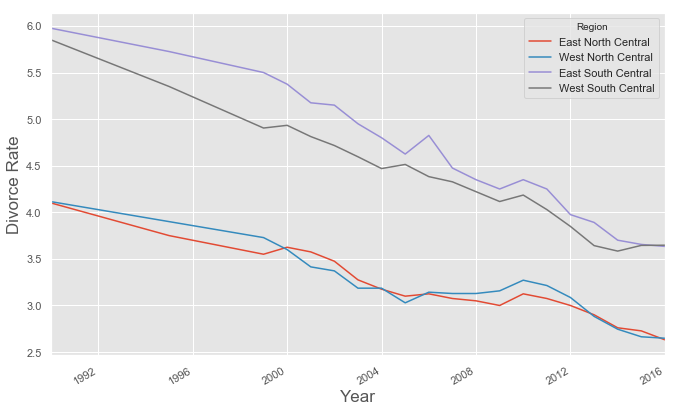

In [36]:
# Calculate mean divorce rates by region
region_means = div_rates_transpose.groupby('Region').mean()
region_means_ts = region_means.transpose()
region_means_ts[['East North Central','West North Central','East South Central','West South Central']].plot(figsize=(11, 7))
plt.ylabel('Divorce Rate')

Trendlines for rates in four of the more obscure official census regions. 

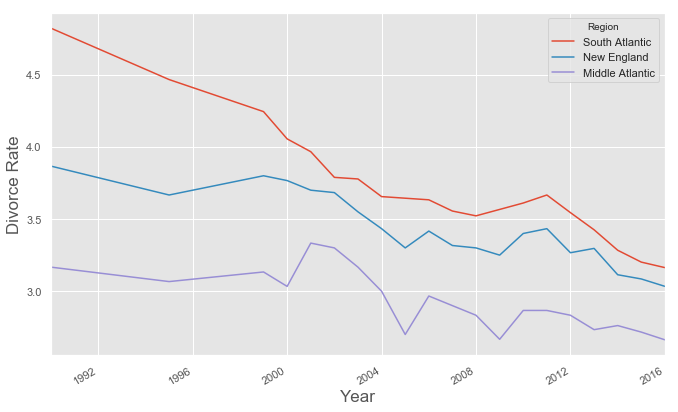

In [35]:
region_means_ts[['South Atlantic','New England','Middle Atlantic']].plot(figsize=(11, 7))
plt.ylabel('Divorce Rate')

In the top graph, adjacent regions exhibit similar rates.  For simplicity, we will combine East North Central and
West North Central into a "Midwest & Great Plains" region, and West South Central and East South Central into a
"Deep South" region.  The bottom plot, however, shows consistent differences between contiguous regions, so we will
preserve the groupings for our study.

In [13]:
# Combine census regions into more recognizable divisions, ie Deep South and Midwest & Great Plains
states_abridged = list(orig_div_rates_ts.columns)
states_abridged.remove('California')
states_abridged.remove('Indiana')
region_dict2 = {('Connecticut','Maine','Massachusetts','New Hampshire','Rhode Island','Vermont'):'New England',\
               ('New Jersey','New York','Pennsylvania'):'Middle Atlantic', ('Illinois','Indiana','Michigan','Ohio','Wisconsin',\
                'Iowa','Kansas','Minnesota','Missouri','Nebraska','North Dakota','South Dakota'):'Midwest & Great Plains',\
                ('Delaware','District of Columbia','Florida','Georgia','Maryland','North Carolina',\
                'South Carolina','Virginia','West Virginia'):'South Atlantic', ('Alabama','Kentucky','Mississippi','Tennessee',\
               'Arkansas','Louisiana','Oklahoma','Texas'):'Deep South', ('Arizona','Colorado','Idaho',\
                'Montana','Nevada','New Mexico','Utah','Wyoming'):'Mountain', ('Alaska','California','Hawaii','Oregon',\
                'Washington'):'Pacific'}
# Create new list of states' regions
new_region_list = list(range(len(states_abridged)))
for i in range(len(states_abridged)):
    for k, v in region_dict2.items():
        if states_abridged[i] in k:
            new_region_list[i] = v
print(new_region_list)

['Deep South', 'Pacific', 'Mountain', 'Deep South', 'Mountain', 'New England', 'South Atlantic', 'South Atlantic', 'South Atlantic', 'South Atlantic', 'Pacific', 'Mountain', 'Midwest & Great Plains', 'Midwest & Great Plains', 'Midwest & Great Plains', 'Deep South', 'Deep South', 'New England', 'South Atlantic', 'New England', 'Midwest & Great Plains', 'Midwest & Great Plains', 'Deep South', 'Midwest & Great Plains', 'Mountain', 'Midwest & Great Plains', 'Mountain', 'New England', 'Middle Atlantic', 'Mountain', 'Middle Atlantic', 'South Atlantic', 'Midwest & Great Plains', 'Midwest & Great Plains', 'Deep South', 'Pacific', 'Middle Atlantic', 'New England', 'South Atlantic', 'Midwest & Great Plains', 'Deep South', 'Deep South', 'Mountain', 'New England', 'South Atlantic', 'Pacific', 'South Atlantic', 'Midwest & Great Plains', 'Mountain']


In [14]:
# Construct new dataframe with revised regions
new_col_idx = pd.MultiIndex.from_arrays([states_abridged, new_region_list], names=['State', 'Region'])
rev_div_rates_abridged = div_rates_abridged
rev_div_rates_abridged.columns = new_col_idx
rev_div_rates_abridged_transpose = rev_div_rates_abridged.transpose()
new_region_means = rev_div_rates_abridged_transpose.groupby('Region').mean()
new_region_means_ts = new_region_means.transpose()

In [15]:
overall_mean = rev_div_rates_abridged_transpose.mean()

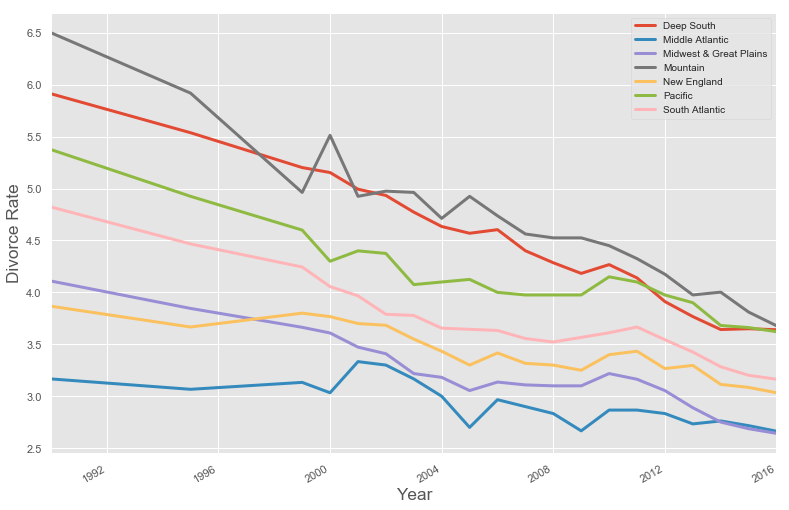

In [40]:
#plt.rcParams['figure.figsize'] = [10, 8]
plt.style.use('ggplot')
new_region_means_ts.plot(figsize=(13, 9), linewidth=3)
plt.legend(fontsize='medium')
plt.xlabel('Year', fontsize='xx-large')
plt.ylabel('Divorce Rate', fontsize='xx-large')

### Differences in regional divorce rates
From 1990 to 2016, the United States saw a clear, overall decline in the rate of divorce from 4.9% to 3.2%.  The
national trend is roughly traced by the plot of the South Atlantic region which spans the Eastern Seaboard from
Delaware to Florida.  The Deep South, Mountain, and Pacific regions appear to have rates consistently above
the national average while New England, Middle Atlantic, and Midwest & Great Plains have lower rates.  Note that the group of four regions with the lowest rates includes many states that were settled earlier in the nation's history.

### Date of statehood and levels of divorce
Admission to the Union followed a westward path starting from the original 13 colonies.  We will investigate if states' dates of admission bear any relation to the rates of divorce among the states.

In [17]:
# Scrape U.S. states' dates of admission from Wikipedia
from bs4 import BeautifulSoup
import re
import requests
r = requests.get('https://en.wikipedia.org/wiki/List_of_U.S._states_by_date_of_admission_to_the_Union')

In [18]:
soup = BeautifulSoup(r.text, 'html.parser')
results = soup.find_all('table', attrs={'class':'sortable wikitable'}) # extract tables from page
first_result = results[0]
table_contents = first_result.find_all('td') #find(), find_all() look for types of tags
print(table_contents[0:3])
print(table_contents[1].text[1:])#[1:-1] # extract state
print(table_contents[2].text) # admission date

[<td data-sort-value="Delaware">1
</td>, <td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="400" data-file-width="600" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c6/Flag_of_Delaware.svg/23px-Flag_of_Delaware.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c6/Flag_of_Delaware.svg/35px-Flag_of_Delaware.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c6/Flag_of_Delaware.svg/45px-Flag_of_Delaware.svg.png 2x" width="23"/> </span><a href="/wiki/Delaware" title="Delaware">Delaware</a>
</td>, <td><span data-sort-value="000000001787-12-07-0000" style="white-space:nowrap">December 7, 1787</span><sup class="reference" id="cite_ref-JRVlist_9-0"><a href="#cite_note-JRVlist-9">[8]</a></sup><br/><small>(ratified)</small>
</td>]
Delaware

December 7, 1787[8](ratified)



In [19]:
# Make dataframe out of state admission date table from Wikipedia
state = []
date = []
for i in range(1, len(table_contents), 4):
    state.append(table_contents[i].text[1:-1])
for c in range(2, len(table_contents), 4):
    string = table_contents[c].text
    date.append(re.findall('[A-Z][a-z].*\s[0-9]*,\s[1][7-9][0-9][0-9]', string))
state_dates = list(zip(state, date))
state_dates = pd.DataFrame(state_dates)
state_dates.columns = ['State', 'Admission Date']
# regex 'findall' outputs items as list, so Admission Dates column is series of single-item lists
dates_list = [date for item in state_dates['Admission Date'] for date in item] # Remove the "[]"s around data

In [20]:
# Replace the dates column with new date list converted to datetime object
state_dates['Admission Date'] = pd.to_datetime(dates_list)
state_dates_sort = state_dates.sort_values('State') # sort state names alphabetically
state_dates_sort.drop([state_dates_sort.index[4], state_dates_sort.index[13]], inplace=True) # drop CA, IN

In [22]:
# Calculate mean divorce rate (1990-2016) of each state
states_mean_rate = pd.DataFrame(div_rates_abridged.mean())
states_mean_rate.drop(states_mean_rate.index[7], inplace=True) # drop District of Columbia
states_mean_rate.columns = ['Mean divorce rate']

In [23]:
# Merge mean rates by state and admission dates (requires same MultiIndex in both)
multidx = states_mean_rate.index
state_dates_sort.index = multidx # Give state and dates same MultiIndex
states_mean_rate.rename(columns={0:'Divorce rate 1990-2016'},  inplace=True)
state_date_rate = state_dates_sort.merge(states_mean_rate, how='left', left_index=True, right_index=True)
pd.to_datetime(state_date_rate['Admission Date'])
del state_date_rate['State'] # delete redundant column
print(state_date_rate.head())

                    Admission Date  Mean divorce rate
State    Region                                      
Alabama  Deep South     1819-12-14           4.730036
Alaska   Pacific        1959-01-03           4.429909
Arizona  Mountain       1912-02-14           4.292582
Arkansas Deep South     1836-06-15           5.706304
Colorado Mountain       1876-08-01           4.419073


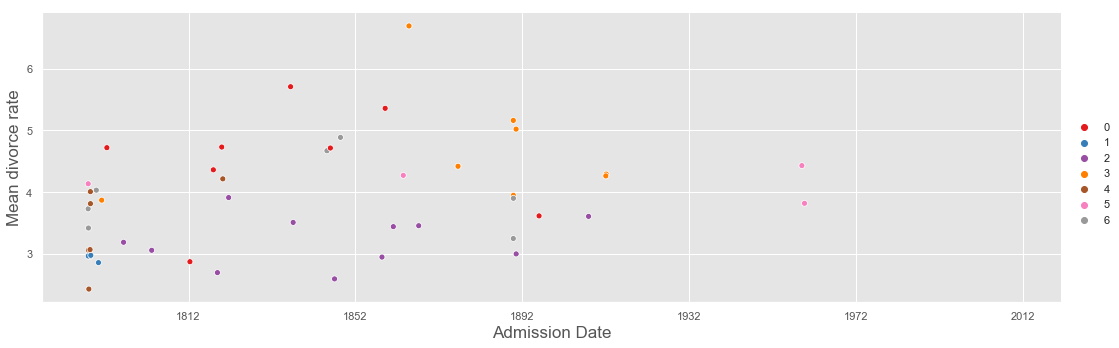

In [44]:
data = state_date_rate
sns.set_context('notebook', rc={'axes.labelsize':17})
fig = sns.relplot(x='Admission Date', y='Mean divorce rate', hue=data.index.labels[1], palette='Set1',\
            legend='full', aspect=3, data=data)

Plotting each state's mean divorce rate with its date of admission, we don't see any pattern suggesting a relationship influenced by time.  However, colors denoting regions hint at the differences between geographical zones.